In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ase.units import Hartree, eV, Bohr, Ang, mol, kcal
import seaborn as sns

### eMol9_C$_\mathrm{M}$

In [2]:
def draw_graph_abs(data,error, save = False, out = None):
    fig = plt.figure(figsize=[6,4.8])
    plt.errorbar(data["rmsd_cutoff"],data["x11_mean"],data["x11_std"], marker='o', color = "black")
    if error == "MAE":
        plt.ylim(0.3, 0.7)
        plt.yticks([0.30,0.35,0.40,0.45,0.50,0.55, 0.60,0.65, 0.70],size = 12)
    elif error == "RMSE":
        plt.ylim(0,2.0)
        plt.yticks(size = 12)
    plt.xticks( size = 12)
    plt.xlabel("RMSD Cutoff (Å)", size = 14,fontname="Arial")
    plt.ylabel(error + " (kcal/mol)", size = 14,fontname="Arial")
    if save:
        plt.savefig(out,dpi = 300)

,rmsd_cutoff,x11_mean,x11_std,MMFF_mean,MMFF_std,energy_abs_mean,energy_abs_std
0,None,0.5134,0.029977,18.2962,0.079948,254719.1714,895.309256
1,1.0,0.5084,0.030375,18.3070,0.082229,254673.7374,884.372639
2,0.9,0.5060,0.030932,18.3130,0.081768,254652.9406,883.154561
3,0.8,0.5004,0.033067,18.3200,0.081949,254618.9418,865.341822
4,0.7,0.4968,0.034026,18.3302,0.082079,254567.6082,867.391783


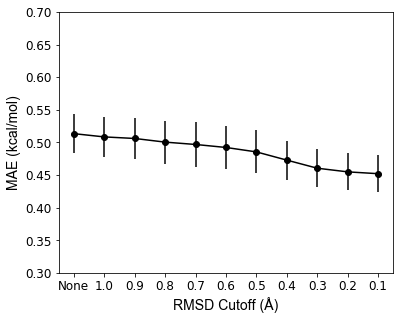

In [3]:
abs_MAE_rmsd2_total = pd.read_csv("eval_result_confs_abs_MAE_total_rmsd2.csv")
abs_MAE_rmsd2_total.head()
draw_graph_abs(abs_MAE_rmsd2_total,"MAE",True, "eMol9_rmsd_abs_MAE.pdf")

,rmsd_cutoff,x11_mean,x11_std,MMFF_mean,MMFF_std,energy_abs_mean,energy_abs_std
0,None,1.2742,0.277666,18.6602,0.100541,256133.8052,908.151803
1,1.0,1.2666,0.278534,18.6700,0.102260,256090.6686,897.022812
2,0.9,1.2612,0.282011,18.6758,0.101249,256071.8838,895.808064
3,0.8,1.2032,0.325245,18.6826,0.101591,256039.2398,877.192071
4,0.7,1.1972,0.328839,18.6906,0.100448,255989.5110,878.927315


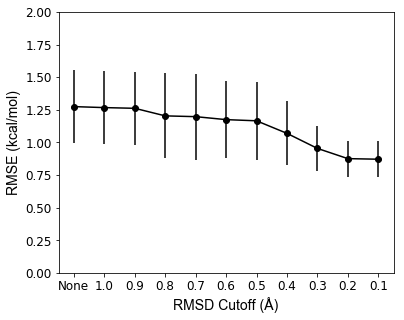

In [4]:
abs_RMSE_rmsd2_total = pd.read_csv("eval_result_confs_abs_RMSE_total_rmsd2.csv")
abs_RMSE_rmsd2_total.head()
draw_graph_abs(abs_RMSE_rmsd2_total,"RMSE", True, "eMol9_rmsd_abs_RMSE.pdf")

In [5]:
def draw_graph_rel(data,error,save = False,out = None):
    fig = plt.figure(figsize=[6,4.8])
    plt.errorbar(data["rmsd_cutoff"],data["x11_mean"],data["x11_std"], marker='o', color = "black", label = "TL_eMol9_C$_\mathrm{M}$")
    plt.errorbar(data["rmsd_cutoff"],data["MMFF_mean"],data["MMFF_std"], marker='o', color = "cornflowerblue", label = "TL_QM9$_\mathrm{M}$")
    plt.errorbar(data["rmsd_cutoff"],data["energy_abs_mean"],data["energy_abs_std"], marker='o', color = "lightblue", label = "MMFF94")
    plt.legend(fontsize = 12)
    if error == "MAE":
        plt.ylim(0,2.0)
        plt.ylabel(error + " (kcal/mol)", size = 14,fontname="Arial")
    elif error == "RMSE":
        plt.ylim(0,3.5)
        plt.ylabel(error + " (kcal/mol)", size = 14,fontname="Arial")
    elif error == "Success Rate":
        plt.ylim(0.5,0.9)
        plt.ylabel(error, size = 14,fontname="Arial")
    plt.xticks( size = 12)
    #plt.yticks([0.50, 0.55, 0.6,0.65, 0.70],size = 12)
    plt.xlabel("RMSD Cutoff (Å)", size = 14,fontname="Arial")
    if save:
        plt.savefig(out,dpi = 300)

,rmsd_cutoff,x11_mean,x11_std,MMFF_mean,MMFF_std,energy_abs_mean,energy_abs_std
0,None,0.5458,0.023937,1.0430,0.184327,1.5990,0.181031
1,1.0,0.5376,0.023610,1.0334,0.181175,1.5872,0.180412
2,0.9,0.5340,0.025195,1.0282,0.181190,1.5604,0.184462
3,0.8,0.5322,0.025694,1.0204,0.170944,1.5424,0.178539
4,0.7,0.5250,0.026840,1.0038,0.163783,1.5182,0.169622


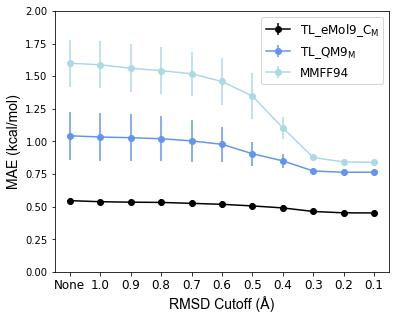

In [6]:
rel_MAE_rmsd2_each = pd.read_csv("eval_result_confs_rel_MAE_each_rmsd2.csv")
rel_MAE_rmsd2_each.head()
draw_graph_rel(rel_MAE_rmsd2_each,"MAE", True, "eMol9_rmsd_rel_MAE.pdf")

,rmsd_cutoff,x11_mean,x11_std,MMFF_mean,MMFF_std,energy_abs_mean,energy_abs_std
0,None,0.7196,0.039540,1.3536,0.183902,2.7020,0.321963
1,1.0,0.7084,0.039414,1.3420,0.180518,2.6714,0.317604
2,0.9,0.7036,0.041287,1.3344,0.180414,2.6164,0.315860
3,0.8,0.7012,0.041393,1.3246,0.170846,2.5698,0.312202
4,0.7,0.6912,0.043018,1.3054,0.162783,2.5110,0.302455


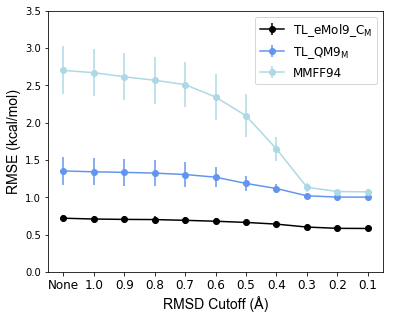

In [7]:
rel_RMSE_rmsd2_each = pd.read_csv("eval_result_confs_rel_RMSE_each_rmsd2.csv")
rel_RMSE_rmsd2_each.head()
draw_graph_rel(rel_RMSE_rmsd2_each,"RMSE",True,"eMol9_rmsd_rel_RMSE.pdf")

### Plati_C$_\mathrm{M}$

In [12]:
def draw_graph_diff_size(data_10, data_11, data_12, error, save = False, out = None):
    fig = plt.figure(figsize=[6,4.8])
    plt.errorbar(data_10["rmsd_cutoff"],data_10["x11_mean"],data_10["x11_std"], marker='o', label = "10", alpha = 0.5)
    plt.errorbar(data_11["rmsd_cutoff"],data_11["x11_mean"],data_11["x11_std"], marker='o', label = "11",alpha = 0.5)
    plt.errorbar(data_12["rmsd_cutoff"],data_12["x11_mean"],data_12["x11_std"], marker='o', label = "12",alpha = 0.5)
    if error == "MAE":
        #plt.ylim(0.8,4.5)
        plt.ylim(0.5,2.8)
    elif error == "RMSE":
        plt.ylim(0,2.0)
        plt.yticks(size = 12)
    plt.legend()
    plt.xticks( size = 12)
    plt.xlabel("RMSD Cutoff (Å)", size = 14,fontname="Arial")
    plt.ylabel(error + " (kcal/mol)", size = 14,fontname="Arial")
    if save:
        plt.savefig(out,dpi = 300)
    

,rmsd_cutoff,x11_mean,x11_std,MMFF_mean,MMFF_std,energy_abs_mean,energy_abs_std
0,None,1.1514,0.056560,19.1712,0.380676,298787.069,0.0
1,1.0,1.1504,0.056365,19.1746,0.380960,298787.064,0.0
2,0.9,1.1492,0.055221,19.1764,0.381010,298787.062,0.0
3,0.8,1.1468,0.055524,19.1846,0.380765,298787.051,0.0
4,0.7,1.1478,0.055887,19.1838,0.379717,298787.046,0.0
5,0.6,1.1490,0.054845,19.1858,0.383682,298786.978,0.0
6,0.5,1.1408,0.057080,19.2122,0.388234,298786.894,0.0
7,0.4,1.1380,0.052437,19.1868,0.393087,298786.550,0.0
8,0.3,1.1380,0.052642,19.1864,0.393346,298786.550,0.0
9,0.2,1.1314,0.050607,19.1960,0.392878,298786.538,0.0


,rmsd_cutoff,x11_mean,x11_std,MMFF_mean,MMFF_std,energy_abs_mean,energy_abs_std
0,None,1.8228,0.225045,19.8958,0.467573,328078.096,0.0
1,1.0,1.8102,0.222507,19.9154,0.469014,328078.080,0.0
2,0.9,1.8090,0.222200,19.9168,0.469151,328078.080,0.0
3,0.8,1.8072,0.221636,19.9186,0.469210,328078.077,0.0
4,0.7,1.7932,0.209633,19.9382,0.472694,328078.050,0.0
5,0.6,1.7918,0.208740,19.9412,0.472585,328078.050,0.0
6,0.5,1.7868,0.211856,19.9486,0.460550,328077.999,0.0
7,0.4,1.7820,0.212701,19.9576,0.456802,328077.907,0.0
8,0.3,1.7494,0.206305,20.0020,0.464592,328077.837,0.0
9,0.2,1.7468,0.206184,20.0064,0.464901,328077.829,0.0


,rmsd_cutoff,x11_mean,x11_std,MMFF_mean,MMFF_std,energy_abs_mean,energy_abs_std
0,None,3.2318,0.571072,19.7780,0.747793,373211.897,0.0
1,1.0,3.2266,0.571087,19.7842,0.747779,373211.884,0.0
2,0.9,3.2256,0.570751,19.7854,0.747563,373211.883,0.0
3,0.8,3.2064,0.564034,19.7318,0.741918,373211.256,0.0
4,0.7,3.2034,0.563520,19.7368,0.741024,373211.243,0.0
5,0.6,3.1732,0.568589,19.6840,0.722762,373210.220,0.0
6,0.5,3.1604,0.571452,19.6842,0.726166,373210.182,0.0
7,0.4,3.1520,0.569552,19.6908,0.726949,373210.164,0.0
8,0.3,3.1480,0.569744,19.6908,0.727510,373210.150,0.0
9,0.2,3.1390,0.570737,19.7034,0.726534,373210.130,0.0


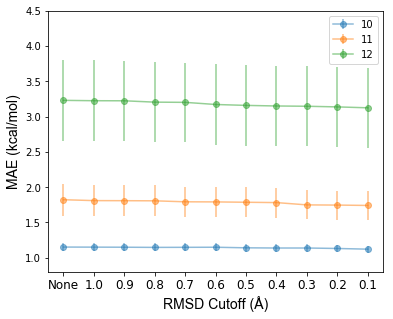

In [10]:
data_10 = pd.read_csv("eval_result_Platinum_10_removelarge_abs_MAE_each_rmsd2.csv")
data_10
data_11 = pd.read_csv("eval_result_Platinum_11_abs_MAE_each_rmsd2.csv")
data_11
data_12 = pd.read_csv("eval_result_Platinum_12_abs_MAE_each_rmsd2.csv")
data_12
draw_graph_diff_size(data_10, data_11, data_12, "MAE", True, "Plati_diff_size_rmsd_abs_MAE.pdf")

,rmsd_cutoff,x11_mean,x11_std,MMFF_mean,MMFF_std,energy_abs_mean,energy_abs_std
0,None,0.7788,0.032034,1.7610,0.564043,1.687,0.000000e+00
1,1.0,0.7776,0.032751,1.7582,0.563835,1.682,0.000000e+00
2,0.9,0.7774,0.031835,1.7584,0.563144,1.685,0.000000e+00
3,0.8,0.7760,0.030653,1.7562,0.563025,1.685,0.000000e+00
4,0.7,0.7740,0.027993,1.7560,0.564219,1.682,0.000000e+00
5,0.6,0.7558,0.037733,1.6572,0.404098,1.617,2.220446e-16
6,0.5,0.7426,0.040068,1.6020,0.357312,1.546,0.000000e+00
7,0.4,0.7230,0.035592,1.0528,0.043296,1.209,0.000000e+00
8,0.3,0.7232,0.035346,1.0524,0.043491,1.209,0.000000e+00
9,0.2,0.7184,0.035387,1.0528,0.043852,1.209,0.000000e+00


,rmsd_cutoff,x11_mean,x11_std,MMFF_mean,MMFF_std,energy_abs_mean,energy_abs_std
0,None,0.9984,0.101980,1.4132,0.367041,1.416,0.0
1,1.0,1.0008,0.101265,1.4060,0.370260,1.403,0.0
2,0.9,0.9992,0.100871,1.4044,0.370604,1.403,0.0
3,0.8,0.9972,0.100097,1.4032,0.370978,1.401,0.0
4,0.7,0.9810,0.090062,1.4030,0.363282,1.396,0.0
5,0.6,0.9788,0.090601,1.4022,0.363784,1.398,0.0
6,0.5,0.9668,0.094732,1.3564,0.318129,1.348,0.0
7,0.4,0.9634,0.096703,1.2762,0.184505,1.276,0.0
8,0.3,0.9528,0.086675,1.2116,0.112199,1.232,0.0
9,0.2,0.9502,0.086712,1.2094,0.111543,1.226,0.0


,rmsd_cutoff,x11_mean,x11_std,MMFF_mean,MMFF_std,energy_abs_mean,energy_abs_std
0,None,2.1256,0.298269,2.4234,0.675443,3.527,0.000000e+00
1,1.0,2.1182,0.298079,2.4190,0.675272,3.515,4.440892e-16
2,0.9,2.1178,0.297730,2.4178,0.675420,3.514,4.440892e-16
3,0.8,2.0054,0.288855,2.2238,0.522184,2.781,0.000000e+00
4,0.7,2.0008,0.286482,2.2188,0.521704,2.770,0.000000e+00
5,0.6,1.9428,0.279944,1.8838,0.274436,1.562,0.000000e+00
6,0.5,1.9300,0.281062,1.8850,0.270555,1.520,0.000000e+00
7,0.4,1.9530,0.294171,1.8962,0.283277,1.513,0.000000e+00
8,0.3,1.9476,0.292183,1.8914,0.284725,1.502,0.000000e+00
9,0.2,1.9386,0.293460,1.8972,0.286762,1.510,0.000000e+00


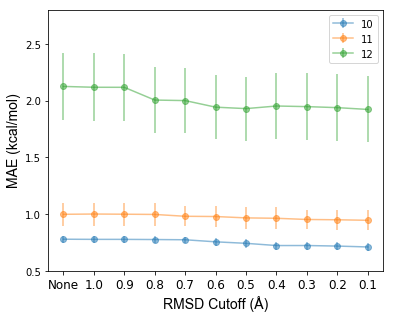

In [13]:
data_10 = pd.read_csv("eval_result_Platinum_10_removelarge_rel_MAE_each_rmsd2.csv")
data_10
data_11 = pd.read_csv("eval_result_Platinum_11_rel_MAE_each_rmsd2.csv")
data_11
data_12 = pd.read_csv("eval_result_Platinum_12_rel_MAE_each_rmsd2.csv")
data_12
draw_graph_diff_size(data_10, data_11, data_12, "MAE", True, "Plati_diff_size_rmsd_rel_MAE.pdf")

In [14]:
def draw_distribution_abs(data_10, data_11, data_12, save = False, out = None):
    fig = plt.figure(figsize=(6,4.8))
    ax = plt.gca()
    sns.distplot(data_10["MAE_mean"],bins = 50, norm_hist = True, kde_kws= {"clip":(0,25)},hist_kws={"range":(0,25)})
    sns.distplot(data_11["MAE_mean"],bins = 50, norm_hist = True, kde_kws= {"clip":(0,25)},hist_kws={"range":(0,25)})
    sns.distplot(data_12["MAE_mean"],bins = 50, norm_hist = True, kde_kws= {"clip":(0,25)},hist_kws={"range":(0,25)})
    ax.legend(labels=["10","11","12"],fontsize = 12)
    plt.xlim((0,25))
    plt.ylim((0,1))
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.ylabel("Density",size = 14, fontname="Arial")
    plt.xlabel("MAE (kcal/mol)", size = 14,fontname="Arial")
    if save:
        plt.savefig(out,dpi = 300);

/Users/jianinglu1/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jianinglu1/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jianinglu1/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jianinglu1/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: 

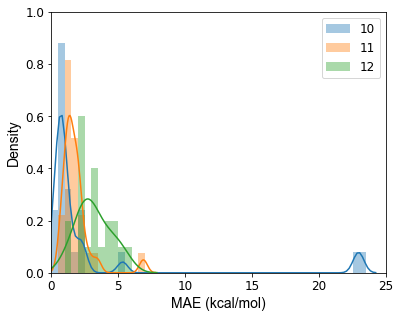

In [15]:
result_10 = pd.read_csv("Platinum_error_distribution_None_None_MAE_abs_10.csv")
result_11 = pd.read_csv("Platinum_error_distribution_None_None_MAE_abs_11.csv")
result_12 = pd.read_csv("Platinum_error_distribution_None_None_MAE_abs_12.csv")
draw_distribution_abs(result_10,result_11,result_12, True, "Error_distribution_abs_MAE.pdf")

In [17]:
def draw_distribution_rel(data_10, data_11, data_12, save = False, out = None):
    fig = plt.figure(figsize=(6,4.8))
    ax = plt.gca()
    sns.distplot(data_10["MAE_mean"],bins = 10, norm_hist = True, kde_kws= {"clip":(0,5)},hist_kws={"range":(0,5)})
    sns.distplot(data_11["MAE_mean"],bins = 10, norm_hist = True, kde_kws= {"clip":(0,5)},hist_kws={"range":(0,5)})
    sns.distplot(data_12["MAE_mean"],bins = 10, norm_hist = True, kde_kws= {"clip":(0,5)},hist_kws={"range":(0,5)})
    ax.legend(labels=["10","11","12"],fontsize = 12)
    plt.xlim((0,5))
    plt.ylim((0,1))
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.ylabel("Density",size = 14, fontname="Arial")
    plt.xlabel("MAE (kcal/mol)", size = 14,fontname="Arial")
    if save:
        plt.savefig(out,dpi = 300);

/Users/jianinglu1/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jianinglu1/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jianinglu1/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jianinglu1/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: 

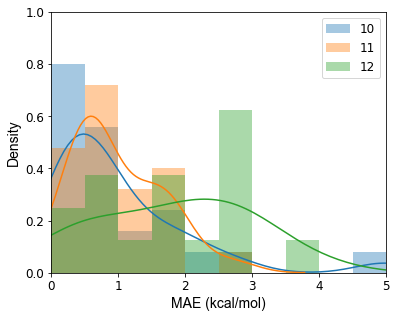

In [18]:
result_10 = pd.read_csv("Platinum_error_distribution_None_None_MAE_rel_10.csv")
result_11 = pd.read_csv("Platinum_error_distribution_None_None_MAE_rel_11.csv")
result_12 = pd.read_csv("Platinum_error_distribution_None_None_MAE_rel_12.csv")
draw_distribution_rel(result_10,result_11,result_12, True, "Error_distribution_rel_MAE.pdf")